# Midterm Exam Solution

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

from matplotlib.ticker import StrMethodFormatter

from datetime import timedelta

import seaborn as sns

## Part 1

In [6]:
housing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv')
pricing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/train_2016_v2.csv')


/tmp/ipykernel_2535/1053388224.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv')


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298522 entries, 0 to 298521
Data columns (total 58 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      298522 non-null  int64  
 1   airconditioningtypeid         81220 non-null   float64
 2   architecturalstyletypeid      0 non-null       float64
 3   basementsqft                  152 non-null     float64
 4   bathroomcnt                   297341 non-null  float64
 5   bedroomcnt                    297341 non-null  float64
 6   buildingclasstypeid           1302 non-null    float64
 7   buildingqualitytypeid         193961 non-null  float64
 8   calculatedbathnbr             285491 non-null  float64
 9   decktypeid                    1670 non-null    float64
 10  finishedfloor1squarefeet      20096 non-null   float64
 11  calculatedfinishedsquarefeet  292951 non-null  float64
 12  finishedsquarefeet12          270833 non-nul

In [8]:
fireplacelist = housing.fireplaceflag.value_counts()
fireplacelist

fireplaceflag
True    523
Name: count, dtype: int64

In [9]:
housing['fireplaceflag'] = housing['fireplaceflag'].fillna(False).convert_dtypes()

/tmp/ipykernel_2535/1726970451.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing['fireplaceflag'] = housing['fireplaceflag'].fillna(False).convert_dtypes()


In [10]:
housing.fireplaceflag

0         False
1         False
2         False
3         False
4         False
          ...  
298517    False
298518    False
298519    False
298520    False
298521    False
Name: fireplaceflag, Length: 298522, dtype: boolean

In [11]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcelid         90275 non-null  int64  
 1   logerror         90275 non-null  float64
 2   transactiondate  90275 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [12]:
zillow_data = pd.merge(housing, pricing, how='inner', on='parcelid')

## Part 2

In [13]:
zillow_data['transactiondate'] = pd.to_datetime(zillow_data['transactiondate'], format='%Y-%m-%d')

print(zillow_data.transactiondate.min())
print(zillow_data.transactiondate.max())

2016-01-01 00:00:00
2016-12-30 00:00:00


In [14]:
table = zillow_data.groupby('yearbuilt')['parcelid'].agg('count').sort_values(ascending=False).to_frame().head(20).reset_index()
table


,yearbuilt,parcelid
0,1955.0,234
1,1989.0,217
2,1950.0,208
3,1954.0,206
4,1973.0,181
5,1990.0,179
6,1987.0,173
7,1964.0,169
8,1956.0,168
9,1963.0,160


In [15]:
zillow_data['yearsold'] = zillow_data['transactiondate'].dt.year

zillow_data['age'] = zillow_data['yearsold'] - zillow_data['yearbuilt']

zillow_data['age'].agg(['mean', 'median']).round(2) 

mean      47.62
median    47.00
Name: age, dtype: float64

In [16]:
table = zillow_data.groupby(['regionidcity', 'regionidcounty'])['parcelid'].agg('count').sort_values(ascending=False).to_frame().head(20).reset_index()
table


,regionidcity,regionidcounty,parcelid
0,12447.0,3101.0,2019
1,46298.0,3101.0,267
2,52650.0,1286.0,220
3,54311.0,3101.0,218
4,5534.0,3101.0,199
5,40227.0,3101.0,192
6,16764.0,1286.0,178
7,25218.0,1286.0,173
8,34278.0,2061.0,156
9,12773.0,1286.0,128


## Part 3

If there's only one observation in a group, then you can't find the standard deviation.

In [17]:
zillow_data.groupby('regionidcity')[['lotsizesquarefeet', 'taxvaluedollarcnt']].agg(['mean', 'std']).round(2) 

lotsizesquarefeet           taxvaluedollarcnt           
                          mean       std              mean        std
regionidcity                                                         
3491.0                 3274.00       NaN         167870.00        NaN
4406.0                21354.93  64831.90         374480.64  354129.67
5465.0                12382.68  26743.93         306986.80  152973.27
5534.0                18029.74  40321.58         175081.05   92749.42
6021.0                 9531.96   6104.76         239490.11  184029.95
...                        ...       ...               ...        ...
396053.0               5382.22   1262.81         176237.06   79733.15
396054.0              24202.78  75097.30         363721.10  375900.13
396550.0               6313.33    399.48         264204.67  191894.76
396551.0               9476.17   5789.85         357663.56  233136.33
396556.0               6219.94   1006.80         188996.11  124439.51

[168 rows x 4 columns]

## Part 4

There are some houses that sold twice in the data set.

In [18]:
df = zillow_data[['parcelid', 'logerror', 'transactiondate', 'regionidcity']]

dupes = df.duplicated(subset=['parcelid'], keep=False)
non_unique_data = df.loc[dupes]
non_unique_data

,parcelid,logerror,transactiondate,regionidcity
431,14607531,-0.0965,2016-06-23,24832.0
432,14607531,0.0070,2016-08-29,24832.0
1536,14444102,-0.1948,2016-04-29,13693.0
1537,14444102,-0.0812,2016-10-05,13693.0
1952,11122560,-0.0202,2016-02-08,54311.0
1953,11122560,-0.0192,2016-08-16,54311.0
2209,11866315,-0.0010,2016-01-12,54212.0
2210,11866315,0.0488,2016-06-14,54212.0
2755,14621246,-0.0141,2016-05-05,33840.0
2756,14621246,0.0159,2016-12-07,33840.0


In [19]:
zillow_data.insert(loc=0, column='transactionID', value=np.arange(len(df)))
zillow_data

,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,yearsold,age
0,0,13005045,NaN,NaN,NaN,3.0,2.0,NaN,7.0,3.0,...,2015.0,42846.0,2246.17,NaN,NaN,6.037432e+13,0.0962,2016-05-18,2016,80.0
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,2015.0,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02,2016,36.0
2,2,12605376,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,2015.0,208897.0,5160.90,NaN,NaN,6.037544e+13,-0.0566,2016-09-28,2016,59.0
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,2015.0,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04,2016,63.0
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,2015.0,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28,2016,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,2015.0,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18,2016,85.0
9067,9067,11907619,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,2015.0,151721.0,4676.24,NaN,NaN,6.037481e+13,0.0266,2016-03-22,2016,35.0
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,2015.0,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21,2016,53.0
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,2015.0,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27,2016,65.0


## Part 5

The natural log "compresses" the scale and reduces the influence of outliers.


The absolute value is the pricing error, without worrying about whether that error is positive or negative.

In [20]:
counts = zillow_data['regionidcity'].value_counts().to_frame()
counts[counts['count'] > 150]

,count
regionidcity,
12447.0,2019
46298.0,267
52650.0,220
54311.0,218
5534.0,199
40227.0,192
16764.0,178
25218.0,173
34278.0,156


In [21]:
zillow_data['houses_sold'] = zillow_data.groupby('regionidcity')['transactionID'].transform('count')

df_screened = zillow_data[zillow_data.houses_sold >= 50].copy()
df_screened 

,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,yearsold,age,houses_sold
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02,2016,36.0,156.0
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04,2016,63.0,2019.0
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28,2016,13.0,156.0
5,5,14115590,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,313188.0,7486.90,NaN,NaN,6.059087e+13,0.0971,2016-02-25,2016,12.0,178.0
6,6,10957959,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,...,75239.0,2125.87,NaN,NaN,6.037312e+13,-0.0274,2016-05-27,2016,78.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,9065,11798813,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,...,115379.0,1917.62,NaN,NaN,6.037204e+13,0.0797,2016-06-23,2016,126.0,2019.0
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18,2016,85.0,2019.0
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21,2016,53.0,112.0
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27,2016,65.0,70.0


In [22]:
df_screened['logerror_abs'] = df_screened['logerror'].abs()

df_screened.groupby('regionidcity')['logerror_abs'].agg(['mean', 'median']).sort_values(by = 'mean', ascending=False).head(10).round(5)


,mean,median
regionidcity,,
53571.0,0.11080,0.05450
24174.0,0.10267,0.05660
26964.0,0.09584,0.04495
14542.0,0.09190,0.02860
12447.0,0.09157,0.04400
45457.0,0.08436,0.04290
33612.0,0.07736,0.03850
5534.0,0.07656,0.03630
54722.0,0.07478,0.02900


## Part 6

You needed to create a categorical variable for this one. 


## Part 7



In [23]:
# ✅ Secure way (Recommended)
#%pip install nasdaq-data-link

import nasdaqdatalink as ndl
import os

In [24]:
# My Secret for this Repo is called NASDAQ
NASDAQ_API_KEY = os.environ.get('NASDAQ')

# Here, I'm setting the API key so that I can access the FRED server
ndl.ApiConfig.api_key = NASDAQ_API_KEY

In [25]:
#print(NASDAQ_API_KEY)

In [26]:
regions = ndl.get_table('ZILLOW/REGIONS', paginate=True)
counties = regions[regions.region_type == 'county']
ct_counties = counties[counties['region'].str.contains(";CT")]


In [27]:
ct_counties

,region_id,region_type,region
None,,,
66550,2987,county,"New London County;CT;Norwich-New London, CT"
66738,2955,county,"Litchfield County;CT;Torrington, CT"
67565,2815,county,"New Haven County;CT;New Haven-Milford, CT"
67650,2800,county,Middlesex County;CT;Hartford-East Hartford-Mid...
73322,2694,county,Fairfield County;CT;Bridgeport-Stamford-Norwal...
77638,2337,county,Hartford County;CT;Hartford-East Hartford-Midd...
79603,2097,county,"Windham County;CT;Worcester, MA-CT"
79984,2054,county,Tolland County;CT;Hartford-East Hartford-Middl...


In [28]:
indicators = ndl.get_table('ZILLOW/INDICATORS', paginate=True)
indicators

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


In [29]:
indicators = ['ZSFH', 'ZALL']  # Add multiple Zillow indicators here
zillow_fc = ndl.get_table('ZILLOW/DATA', indicator_id = indicators, paginate = True, region_id = 2694,  qopts = {'columns': ['indicator_id', 'region_id', 'date', 'value']})

In [30]:
zillow_fc

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,2694,2025-01-31,707550.085090
1,ZSFH,2694,2024-12-31,707684.554761
2,ZSFH,2694,2024-11-30,708012.618503
3,ZSFH,2694,2024-10-31,707724.179445
4,ZSFH,2694,2024-09-30,706251.438274
...,...,...,...,...
693,ZALL,2694,1996-05-31,235897.000000
694,ZALL,2694,1996-04-30,235296.000000
695,ZALL,2694,1996-03-31,234607.000000


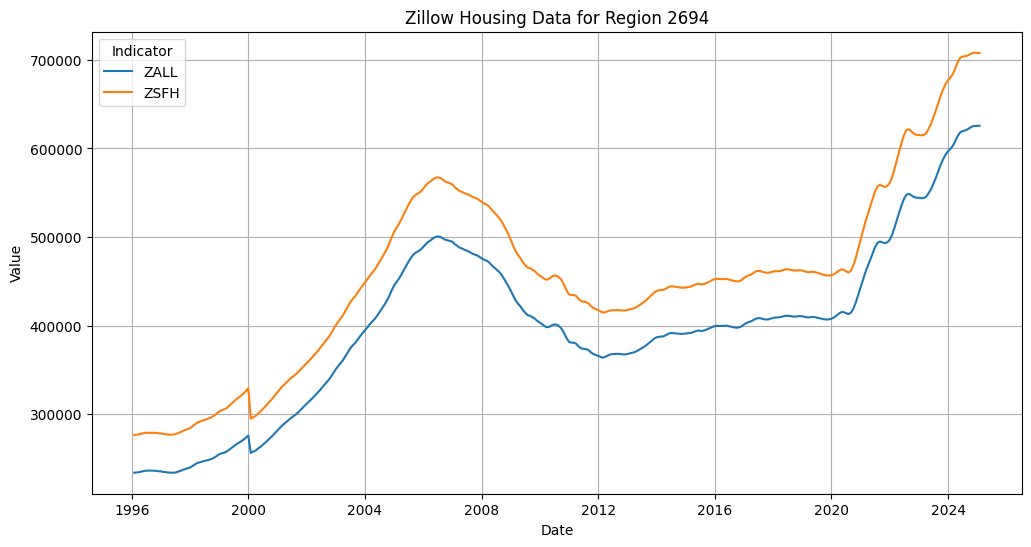

In [31]:
# Convert date column to datetime format
zillow_fc['date'] = pd.to_datetime(zillow_fc['date'])

# Sort by date for proper plotting
zillow_fc = zillow_fc.sort_values('date')

# Create plot
plt.figure(figsize=(12, 6))

# Plot each indicator separately
for indicator, data in zillow_fc.groupby('indicator_id'):
    plt.plot(data['date'], data['value'], label=indicator)

# Formatting the plot
plt.title("Zillow Housing Data for Region 2694")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(title="Indicator")
plt.grid(True)

# Show plot
plt.show()

## Part 8

For the graph that I asked you to look at, the key was that the "good" returns were the first half of the sample. This then compounds over the second half, even if returns between both the call-based and market strategies were similar. You probably don't want to base an investment strategy on something that did well a long time ago, has not outperformed since, and that others have probably figured out.

In [32]:
import yfinance as yf
prices = yf.download(['MSTY', 'MSTR'], period='6mo')
prices

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Price            Close                   High                    Low  \
Ticker            MSTR       MSTY        MSTR       MSTY        MSTR   
Date                                                                   
2024-09-10  129.639999  12.747258  129.820007  12.747258  121.550003   
2024-09-11  129.279999  12.807671  131.000000  12.885604  121.300003   
2024-09-12  130.770004  12.958705  134.100006  13.049325  127.269997   
2024-09-13  141.470001  13.200359  143.000000  13.254732  129.839996   
2024-09-16  134.529999  12.747258  137.880005  12.988912  132.669998   
...                ...        ...         ...        ...         ...   
2025-03-04  275.149994  20.940001  293.040009  21.879999  237.009995   
2025-03-05  308.549988  22.700001  311.279999  22.809999  271.769989   
2025-03-06  304.109985  22.610001  320.940002  23.250000  292.170013   
2025-03-07  287.179993  21.770000  310.440002  23.010000  281.440002   
2025-03-10  251.679993  19.309999  272.000000  20.750000  247.199997   

Price                        Open               Volume           
Ticker           MSTY        MSTR       MSTY      MSTR     MSTY  
Date                                                             
2024-09-10  12.167288  123.000000  12.336446   7738000   792700  
2024-09-11  12.203535  124.809998  12.541851   8731200   769800  
2024-09-12  12.692885  129.000000  12.837877   6052400   678000  
2024-09-13  12.940581  131.100006  12.946622  12239100   585400  
2024-09-16  12.578100  137.020004  12.898292   8765900   772800  
...               ...         ...        ...       ...      ...  
2025-03-04  18.870001  240.279999  19.040001  30130200  7007500  
2025-03-05  20.799999  278.309998  21.230000  26199800  4417000  
2025-03-06  21.940001  298.950012  22.340000  25309500  5364700  
2025-03-07  21.260000  298.149994  22.410000  22711600  6377200  
2025-03-10  19.014999  267.579987  20.549999  10236677  4535888  

[124 rows x 10 columns]

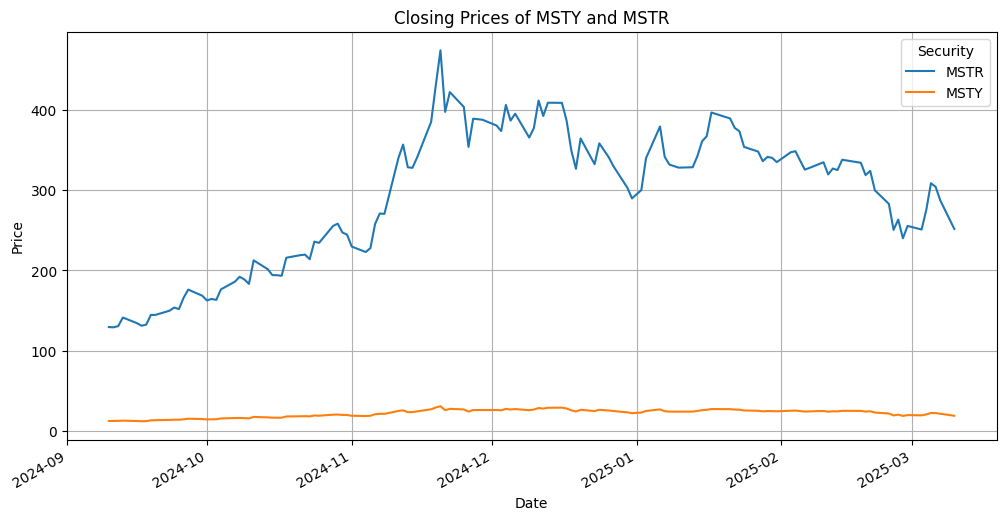

In [33]:

# Select only the 'Close' prices
closing_prices = prices['Close']

# Plot the closing prices
closing_prices.plot(figsize=(12, 6), title="Closing Prices of MSTY and MSTR")

# Show the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(title="Security")
plt.grid(True)
plt.show()

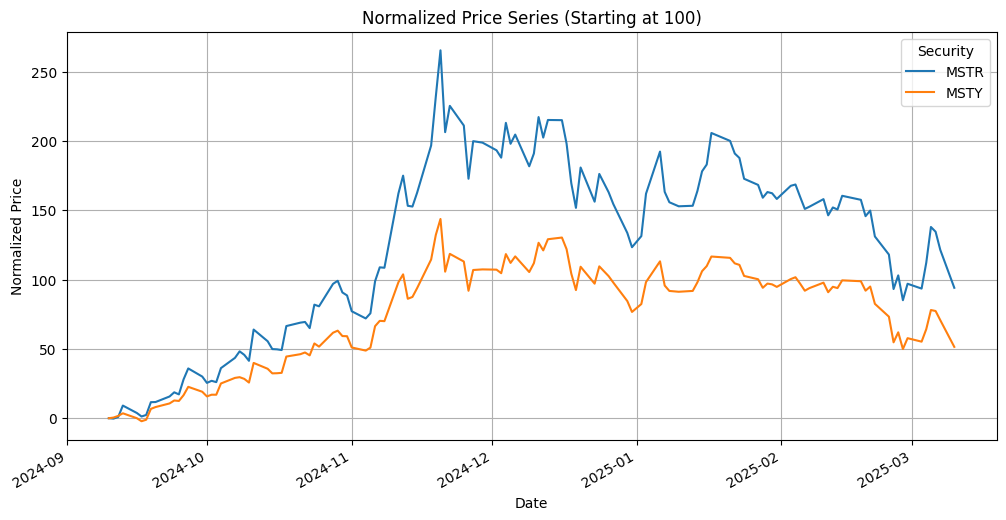

In [34]:
# Normalize the prices (first value = 100)
normalized_prices = (closing_prices / closing_prices.iloc[0]) * 100 - 100

# Plot the normalized price series
normalized_prices.plot(figsize=(12, 6), title="Normalized Price Series (Starting at 100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend(title="Security")
plt.grid(True)
plt.show()

## Part 9

Lots of ways to go about this one. One key thing - if you are looking for lead/lag relationships, make sure that you actually shift the variables across time. For example, I create a VIX three months later variable, to see if I can "predict" it. 

In [35]:
from fredapi import Fred
import os

# My Secret for this Repo is called FRED
FRED_API_KEY = os.environ.get('FRED')

# Here, I'm setting the API key so that I can access the FRED server
fred = Fred(api_key=FRED_API_KEY)

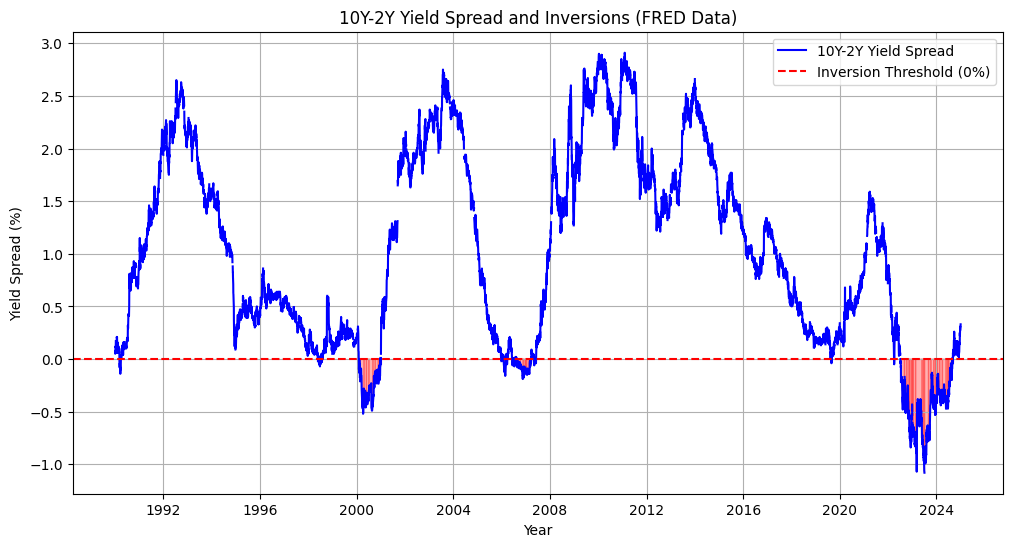

In [36]:
# Define series and time range
start_date = "1990-01-01"
end_date = "2024-12-31"

# Pull data from FRED API
dgs10 = fred.get_series('DGS10', start_date, end_date)  # 10-year Treasury Yield
dgs2 = fred.get_series('DGS2', start_date, end_date)    # 2-year Treasury Yield
vix = fred.get_series('VIXCLS', start_date, end_date)   # VIX (Market Volatility)

# Combine into a DataFrame
df = pd.DataFrame({'DGS10': dgs10, 'DGS2': dgs2, 'VIXCLS': vix})

# Compute yield spread
df['Yield_Spread'] = df['DGS10'] - df['DGS2']

# Plot yield spread over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Yield_Spread'], label="10Y-2Y Yield Spread", color='b')
plt.axhline(y=0, color='r', linestyle='--', label="Inversion Threshold (0%)")

# Highlight inversion periods
plt.fill_between(df.index, df['Yield_Spread'], 0, where=(df['Yield_Spread'] < 0), color='red', alpha=0.3)

# Formatting
plt.title("10Y-2Y Yield Spread and Inversions (FRED Data)")
plt.xlabel("Year")
plt.ylabel("Yield Spread (%)")
plt.legend()
plt.grid(True)
plt.show()

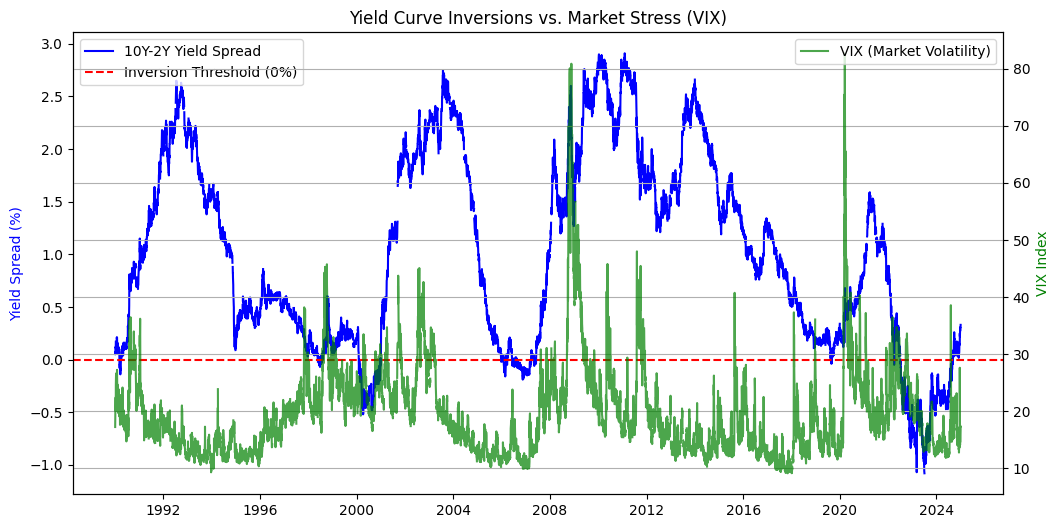

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Yield_Spread'], label="10Y-2Y Yield Spread", color='b')
plt.axhline(y=0, color='r', linestyle='--', label="Inversion Threshold (0%)")

# Overlay VIX (secondary y-axis for better visibility)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df.index, df['VIXCLS'], label="VIX (Market Volatility)", color='g', alpha=0.7)

# Formatting
ax.set_ylabel("Yield Spread (%)", color='b')
ax2.set_ylabel("VIX Index", color='g')
ax.set_title("Yield Curve Inversions vs. Market Stress (VIX)")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid(True)
plt.show()

In [38]:
df['Inverted'] = df['Yield_Spread'] < 0  # Boolean: True when inverted
df['VIX_3mo_Later'] = df['VIXCLS'].shift(-90)  # Check VIX 3 months later

correlation = df[['Inverted', 'VIX_3mo_Later']].corr()
print("Correlation between inversions and VIX (3-month lag):\n", correlation)

Correlation between inversions and VIX (3-month lag):
                Inverted  VIX_3mo_Later
Inverted       1.000000      -0.069076
VIX_3mo_Later -0.069076       1.000000


## Part 10

**ENJOY SPRING BREAK!!!**

Do the usual add/commit/synch. I hope that this "exam" did more than just reinforce some basic data wrangling principles. I tried to introduce you to a few new tools and really show you how the day-to-day data process works. Financial data has its own peculiarities too.